In [60]:
import pandas as pd
import os

In [61]:
if os.path.exists('../cover-not-found.jpg'):
    print('ada nih')
else:
    print('gaada')

ada nih


In [62]:
from pathlib import Path


cwd = Path.cwd()
noCover = f'{cwd.parent}\\cover-not-found.jpg'

print(cwd)
print(noCover)


e:\_BACKUP\Documents\Belajar Pemrograman\Book-Recommender\backend\notebooks
e:\_BACKUP\Documents\Belajar Pemrograman\Book-Recommender\backend\cover-not-found.jpg


In [63]:
books = pd.read_csv('../data/books_with_emotions.csv')
books

,Unnamed: 0,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,...,title_and_subtitle,tagged_description,simple_categories,anger,disgust,fear,joy,sadness,surprise,neutral
0,0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,...,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction,0.064134,0.273591,0.928168,0.932797,0.646216,0.967158,0.729603
1,1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,...,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...,Fiction,0.612619,0.348284,0.942528,0.704422,0.887939,0.111690,0.252545
2,3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,...,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction,0.064134,0.104007,0.972321,0.767237,0.549477,0.111690,0.078766
3,4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,...,The Four Loves,9780006280897 Lewis' work on the nature of lov...,Nonfiction,0.351484,0.150723,0.360706,0.251881,0.732685,0.111690,0.078766
4,5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,...,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le...",Nonfiction,0.081412,0.184495,0.095043,0.040564,0.884390,0.475881,0.078766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,...,Mistaken Identity,9788172235222 On A Train Journey Home To North...,Fiction,0.148208,0.030643,0.919165,0.255170,0.853722,0.980877,0.030656
5193,6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,...,Journey to the East,9788173031014 This book tells the tale of a ma...,Nonfiction,0.064134,0.114383,0.051363,0.400263,0.883199,0.111690,0.227765
5194,6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,...,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...,Fiction,0.009997,0.009929,0.339218,0.947779,0.375755,0.066685,0.057625
5195,6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,...,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Nonfiction,0.064134,0.104007,0.459269,0.759455,0.951104,0.368111,0.078766


In [64]:
books['thumbnail'].isna().iloc[2]

np.False_

In [65]:
count = 0
for i in books:
    if i == "thumbnail":
        for j in range(len(books['thumbnail'])):
            if books[i].isna().iloc[j] == True:
                print(books['title'][j])
                count += 1
        break
print(count)

The Lord of the Rings
The Song of Rhiannon
The Screwtape Letters ; With, Screwtape Proposes a Toast
The Journey with Grandmother
The Paradox of Choice
Size 12 Is Not Fat
The Mediator #4: Darkest Hour
The Mediator #5: Haunted
The Sheltering Sky
The Hidden Hand
Virgin
All Quiet on the Western Front
Total Recall
Things Fall Apart
Big Money
We Were the Rats
The Divine Comedy & Paradise
The Spy who Loved Me
Dirty Beasts
I'm Afraid You've Got Dragons
The Sleeping Giant and Other Stories
The Diary of Anaïs Nin
The Hound of the Baskervilles
Stuart Little
The Sun in the Morning
Think Like a Guy
Dry
The Starry Rift
Twilight
Cirque Du Freak #10: The Lake of Souls
Last Lion, The: Volume 1
Invisible Cities
Blackout
Fire on the Mountain (Hb)
Visions from Nowhere
Mission to Moulokin
Twister
Tsubasa 9 Reservoir Chronicle
Tsubasa, 11
Tsubasa 12 Reservoir Chronicle
The World According to Garp
The Lost Continent
The Life and Death of My Lord Gilles de Rais
The Age of Extremes
A Likely Lad
Sizzle
The Good

In [66]:
import numpy as np

books["large_thumbnail"] = books["thumbnail"] + "&fife=w800"
books["large_thumbnail"] = np.where(
    books["large_thumbnail"].isna(),
    noCover,
    books["large_thumbnail"],
)

In [67]:
books['large_thumbnail']

0       http://books.google.com/books/content?id=KQZCP...
1       http://books.google.com/books/content?id=gA5GP...
2       http://books.google.com/books/content?id=FKo2T...
3       http://books.google.com/books/content?id=XhQ5X...
4       http://books.google.com/books/content?id=Kk-uV...
                              ...                        
5192    http://books.google.com/books/content?id=q-tKP...
5193    http://books.google.com/books/content?id=rq6JP...
5194    http://books.google.com/books/content?id=c_7mf...
5195    http://books.google.com/books/content?id=Fv_JP...
5196    http://books.google.com/books/content?id=Vy7Sk...
Name: large_thumbnail, Length: 5197, dtype: object

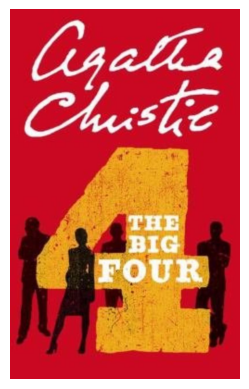

In [77]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

url = 'http://books.google.com/books/content?id=wcOQUSWQEdUC&printsec=frontcover&img=1&zoom=1&source=gbs_api&fife=w800'
response = requests.get(url)
image = Image.open(BytesIO(response.content))

plt.imshow(image)
plt.axis('off')  # Hide axes for better display
plt.show()

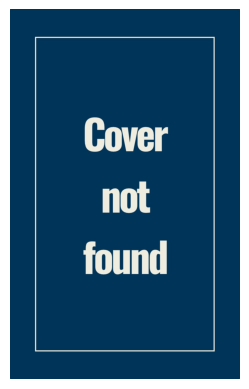

In [80]:
# Display image from local file
local_path = noCover
img = Image.open(local_path)
plt.imshow(img)
plt.axis('off')  # Hide axes for better display
plt.show()

In [68]:
books.dtypes

Unnamed: 0                int64
isbn13                    int64
isbn10                   object
title                    object
subtitle                 object
authors                  object
categories               object
thumbnail                object
description              object
published_year          float64
average_rating          float64
num_pages               float64
ratings_count           float64
missing_description       int64
age_of_book             float64
words_in_description      int64
title_and_subtitle       object
tagged_description       object
simple_categories        object
anger                   float64
disgust                 float64
fear                    float64
joy                     float64
sadness                 float64
surprise                float64
neutral                 float64
large_thumbnail          object
dtype: object

In [69]:
#     joy: float
    # surprise: float
    # anger: float
    # fear: float
    # sadness: float
    # simple_categories: str

In [70]:
# book_columns = ['isbn13', 'title', 'authors', 'description', 'average_rating']
books_df = pd.DataFrame({'isbn13': books['isbn13'],
                         'title': books['title'],
                         'authors': books['authors'],
                         'description': books['description'],
                         'average_rating': books['average_rating'],
                         'joy': books['joy'],
                         'surprise': books['surprise'],
                         'anger': books['anger'],
                         'fear': books['fear'],
                         'sadness': books['sadness'],
                         'simple_categories': books['simple_categories']})

In [71]:
books_df

,isbn13,title,authors,description,average_rating,joy,surprise,anger,fear,sadness,simple_categories
0,9780002005883,Gilead,Marilynne Robinson,A NOVEL THAT READERS and critics have been eag...,3.85,0.932797,0.967158,0.064134,0.928168,0.646216,Fiction
1,9780002261982,Spider's Web,Charles Osborne;Agatha Christie,A new 'Christie for Christmas' -- a full-lengt...,3.83,0.704422,0.111690,0.612619,0.942528,0.887939,Fiction
2,9780006178736,Rage of angels,Sidney Sheldon,"A memorable, mesmerizing heroine Jennifer -- b...",3.93,0.767237,0.111690,0.064134,0.972321,0.549477,Fiction
3,9780006280897,The Four Loves,Clive Staples Lewis,Lewis' work on the nature of love divides love...,4.15,0.251881,0.111690,0.351484,0.360706,0.732685,Nonfiction
4,9780006280934,The Problem of Pain,Clive Staples Lewis,"""In The Problem of Pain, C.S. Lewis, one of th...",4.09,0.040564,0.475881,0.081412,0.095043,0.884390,Nonfiction
...,...,...,...,...,...,...,...,...,...,...,...
5192,9788172235222,Mistaken Identity,Nayantara Sahgal,On A Train Journey Home To North India After L...,2.93,0.255170,0.980877,0.148208,0.919165,0.853722,Fiction
5193,9788173031014,Journey to the East,Hermann Hesse,This book tells the tale of a man who goes on ...,3.70,0.400263,0.111690,0.064134,0.051363,0.883199,Nonfiction
5194,9788179921623,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,"Wisdom to Create a Life of Passion, Purpose, a...",3.82,0.947779,0.066685,0.009997,0.339218,0.375755,Fiction
5195,9788185300535,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,This collection of the timeless teachings of o...,4.51,0.759455,0.368111,0.064134,0.459269,0.951104,Nonfiction


In [72]:
books_df['isbn13'] = books_df['isbn13'].astype(str)
books_df.dtypes

isbn13                object
title                 object
authors               object
description           object
average_rating       float64
joy                  float64
surprise             float64
anger                float64
fear                 float64
sadness              float64
simple_categories     object
dtype: object

In [73]:
isbn13 = 9780002005883
found_book_df = books_df[books_df['isbn13'] == str(isbn13)]

found_book_df.iloc[0].to_dict()

{'isbn13': '9780002005883',
 'title': 'Gilead',
 'authors': 'Marilynne Robinson',
 'description': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of lif

In [74]:
import pandas as pd

# Buat DataFrame contoh yang mirip dengan yang Anda muat
sample_data = {
    'isbn13': ['9780321765723', '9780132350884'],
    'title': ['Clean Code', 'The Pragmatic Programmer'],
    'authors': ['Robert C. Martin', 'Andrew Hunt, David Thomas'],
    'description': ['A handbook of agile software craftsmanship.', 'From Journeyman to Master.'],
    'average_rating': [4.7, 4.5]
}
df = pd.DataFrame(sample_data)

# Simulasikan filter
isbn_to_find = '9780321765723'
found_df = df[df['isbn13'] == isbn_to_find]

if not found_df.empty:
    result_dict = found_df.iloc[0].to_dict()
    print("Hasil .to_dict():", result_dict)
    print("Tipe result_dict:", type(result_dict))
    # Periksa tipe data setiap value di dictionary ini:
    for key, value in result_dict.items():
        print(f"  {key}: {type(value)} - {value}")
else:
    print("Tidak ditemukan.")

Hasil .to_dict(): {'isbn13': '9780321765723', 'title': 'Clean Code', 'authors': 'Robert C. Martin', 'description': 'A handbook of agile software craftsmanship.', 'average_rating': 4.7}
Tipe result_dict: <class 'dict'>
  isbn13: <class 'str'> - 9780321765723
  title: <class 'str'> - Clean Code
  authors: <class 'str'> - Robert C. Martin
  description: <class 'str'> - A handbook of agile software craftsmanship.
  average_rating: <class 'float'> - 4.7
